---
# **1. Instalación de bibliotecas**

---

In [ ]:
!pip install fuzzywuzzy
!pip install mplcursors
!pip install pandas plotly
!pip install selenium
!pip install python-docx
!pip install python-Levenshtein
!pip install plotly


---
# **2. Importación de librerias**

---

In [2]:
# Importar bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
import statsmodels.formula.api as smf

# Importar Sub - Bibliotecas

from tabulate import tabulate
from scipy.stats import rankdata
from IPython.display import display,HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

---
# **3. Marco de datos**

---

In [4]:
# Importar el archivo CSV
df = pd.read_csv("/content/BOSTON.csv")

# Imprime las primeras filas del DataFrame
df.head()


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


---
# **4. Análisis exploratorio**

---

### 4.1  Estructura de la Matriz

In [5]:
df.shape
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("El DataFrame tiene", df.shape[0], "filas y", df.shape[1], "columnas.")


Respuesta:
El DataFrame tiene 506 filas y 7 columnas.


### 4.2  Identificación Dtype por variable

In [6]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
df.info()

Respuesta:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [7]:
# Seleccionar columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()

#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")

# Imprimir las columnas seleccionadas
print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

Respuesta:
Columnas categóricas: []
Columnas numéricas: ['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']


### 4.3  Análisis de dispersión

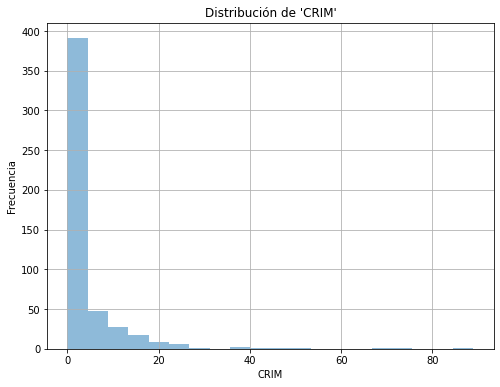

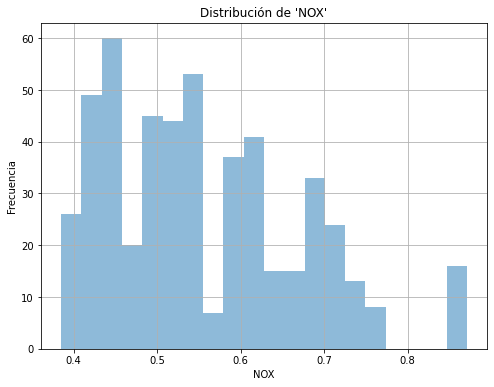

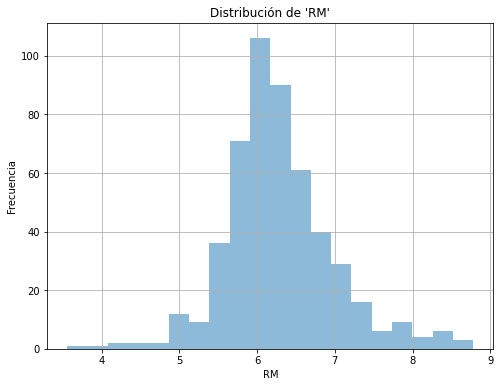

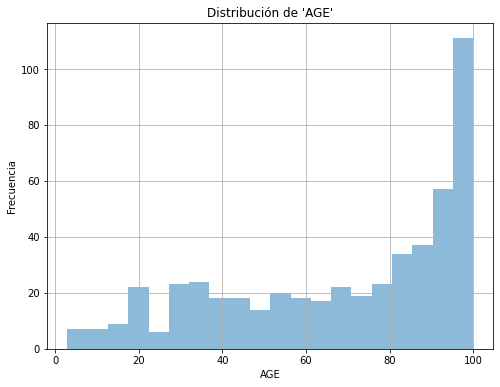

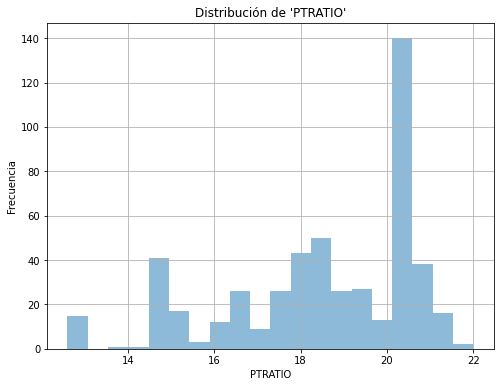

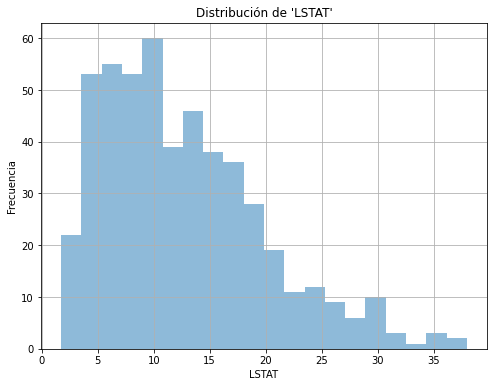

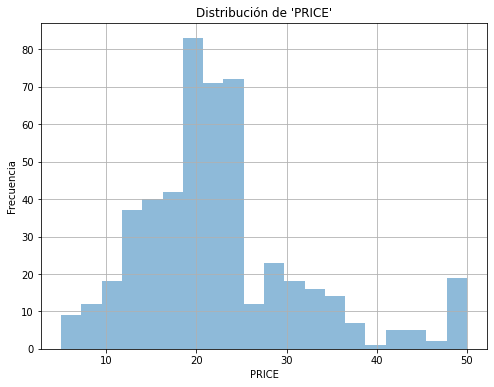

In [8]:
# Crear una función para describir características numéricas con histogramas
def desc_num_feature(df, num_cols):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    df[num_cols].hist(bins=20, alpha=0.5, ax=ax)
    ax.set_xlabel(num_cols)
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Distribución de '{num_cols}'")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

# Iterar a través de la lista de nombres de características numéricas y llamar a la función desc_num_feature para cada una
num_cols = ['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']
for num_cols in num_cols:
    desc_num_feature(df, num_cols)

In [ ]:
moda = df["PRICE"].mode()[0]
print("La moda de la columna PRICE es:", moda)


La moda de la columna PRICE es: 50.0


In [ ]:
moda = df['PTRATIO'].mode()[0]
print("La moda de la columna PTRATIO es:", moda)

La moda de la columna PTRATIO es: 20.2


### 4.4  Análisis de correlación

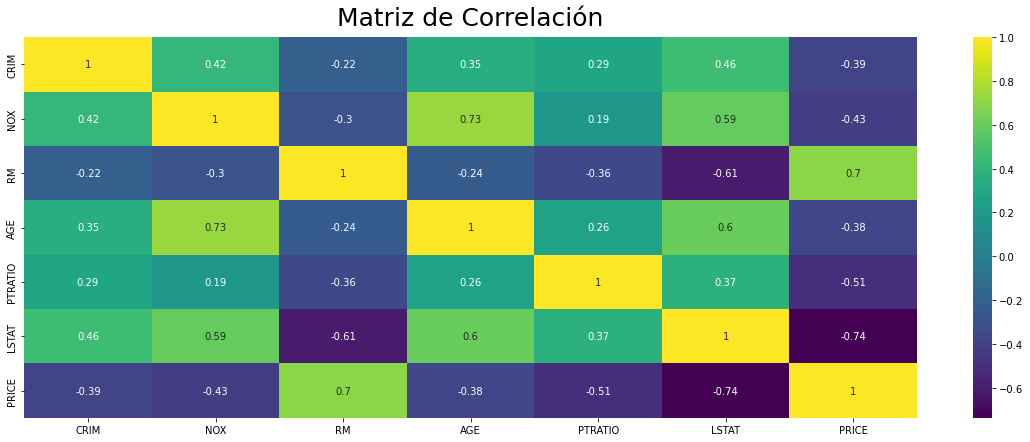

In [ ]:
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df.corr(), cmap="viridis", annot=True)
heatmap.set_title("Matriz de Correlación", fontdict={"fontsize": 25}, pad=12)
plt.show()

---
# **5. Entrenamiento de modelos y cálculo de ECM**

---

#### Escenario 1: PRICE vs RM

In [21]:
E1 = smf.ols(formula="PRICE~RM" , data=df).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E1.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.49e-74
Time:                        22:09:02   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.0

In [22]:
price_pred = E1.predict(pd.DataFrame(df["RM"]))
df["RSE"] = (df["PRICE"] - price_pred)**2
SSD = sum(df["RSE"])
RSE = np.sqrt(SSD / (len(df) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE, 2)

ECM:


6.62

#### Escenario 2: PRICE vs RM + LSTAT

In [34]:
E2 = smf.ols(formula="PRICE~RM+LSTAT" , data=df).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E2.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          7.01e-112
Time:                        22:12:14   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.4

In [26]:
price_pred2 = E2.predict(pd.DataFrame(df[["RM", "LSTAT"]]))
df["RSE2"] = (df["PRICE"] - price_pred2)**2
SSD2 = sum(df["RSE2"])
RSE2 = np.sqrt(SSD2 / (len(df) - 3))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE2, 2)


ECM:


5.54

#### Escenario 3: PRICE vs RM+LSTAT+CRIM

In [35]:
E3 = smf.ols(formula="PRICE~RM+LSTAT+CRIM" , data=df).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E3.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          1.01e-112
Time:                        22:12:19   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5623      3.166     -0.8

In [28]:
price_pred3 = E3.predict(pd.DataFrame(df[["RM", "LSTAT", "CRIM"]]))
df["RSE3"] = (df["PRICE"] - price_pred3)**2
SSD3 = sum(df["RSE3"])
RSE3 = np.sqrt(SSD3 / (len(df) - 3 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE3, 2)

ECM:


5.49

#### Escenario 4: PRICE vs RM+LSTAT+PTRATIO

In [36]:
E4 = smf.ols(formula="PRICE~RM+LSTAT+PTRATIO" , data=df).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E4.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          2.69e-123
Time:                        22:12:24   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.7

In [20]:
# Definir X e y
X = df_V1[['RM', 'PTRATIO', 'LSTAT']]
y = df_V1["PRICE"]

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores de y para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)

# Imprimir el resultado
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("El error absoluto medio es:", mae)


Respuesta:
El error absoluto medio es: 4.404434993909257


In [31]:
price_pred4 = E4.predict(pd.DataFrame(df[["RM", "LSTAT", "PTRATIO"]]))
df["RSE4"] = (df["PRICE"] - price_pred4)**2
SSD4 = sum(df["RSE4"])
RSE4 = np.sqrt(SSD4 / (len(df) - 3 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE4, 2)


ECM:


5.23

#### Escenario 5: PRICE vs LSTAT

In [37]:
E5 = smf.ols(formula="PRICE~LSTAT" , data=df).fit()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(E5.summary())

Respuesta:
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.08e-88
Time:                        22:12:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.4

In [33]:
price_pred5 = E5.predict(pd.DataFrame(df[["LSTAT"]]))
df["RSE5"] = (df["PRICE"] - price_pred5)**2
SSD5 = sum(df["RSE5"])
RSE5 = np.sqrt(SSD4 / (len(df) - 1 - 1))
print("\033[43m\033[30m\033[1mECM:\033[0m")
round(RSE5, 2)


ECM:


5.22

---
# **6. Actividades**

---

### 6.1  Punto de control

In [15]:
# Generar una copia del DataFrame con otro nombre
df_V1_copy = df.copy()

# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_V1_copy.to_csv("/content/BOSTON_V1.csv", index=False)

# Importar el archivo CSV
df_V1 = pd.read_csv("/content/BOSTON_V1.csv")

### 6.2  Eliminar variables / columnas

In [16]:
# Eliminar varias columnas
df_V1.drop(['CRIM', 'NOX', 'AGE'], axis=1, inplace=True)

# Guardar el archivo
df_V1.to_csv('/content/BOSTON_V1.csv', index=False)


### 6.2  Identifiquen el objetivo (X) y las características (y)

In [17]:
# Agregar los nombres de las columnas
df_V1.columns = ['RM', 'PTRATIO', 'LSTAT', 'PRICE']

# Convertir los valores de las columnas a numéricos
columnas_numericas = ['RM', 'PTRATIO', 'LSTAT', 'PRICE']
df[columnas_numericas] = df_V1[columnas_numericas].apply(pd.to_numeric)

# Agregar dos decimales a los valores numéricos
pd.options.display.float_format = '{:.2f}'.format      

# Separar los datos en una matriz de características (X) y un vector objetivo (y)
X = df_V1.drop(["PRICE"], axis=1)  # Se eliminan las columnas que no son el vector objetivo
y = df_V1["PRICE"]

# Imprimir la matriz de características (X) en formato de tabla
print("\n\033[43m\033[30m\033[1mMatriz de características (X):\033[0m")
print(X.head().to_string(index=False, header=True))

# Imprimir el vector objetivo (y) en formato de tabla
print("\n\033[43m\033[30m\033[1mVector objetivo (y):\033[0m")
print(y.head().to_string(index=False, header=True))

# Guardar el archivo
df_V1.to_csv('/content/BOSTON_V1.csv', index=False)



Matriz de características (X):
  RM  PTRATIO  LSTAT
6.58    15.30   4.98
6.42    17.80   9.14
7.18    17.80   4.03
7.00    18.70   2.94
7.15    18.70   5.33

Vector objetivo (y):
24.00
21.60
34.70
33.40
36.20


### 6.3  Crear un train test split en los datos. Utilicen un número aleatorio 42 por coherencia.

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")

# Imprimir los conjuntos de entrenamiento y prueba en formato de tabla
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Conjunto de entrenamiento:")
print(pd.concat([X_train, y_train], axis=1).head().to_string(index=False))

print("Conjunto de prueba:")
print(pd.concat([X_test, y_test], axis=1).head().to_string(index=False))

# Guardar el archivo
df_V1.to_csv('/content/BOSTON_V1.csv', index=False)

Respuesta:
Conjunto de entrenamiento:
  RM  PTRATIO  LSTAT  PRICE
6.43    18.70   5.21  28.70
6.18    17.80  12.04  21.20
5.68    17.90  10.21  19.30
5.93    21.00   6.58  23.10
5.93    20.20  18.13  19.10
Conjunto de prueba:
  RM  PTRATIO  LSTAT  PRICE
6.42    16.60   9.04  23.60
6.76    17.60   3.53  32.40
5.98    20.10  18.07  13.60
6.07    19.20   5.52  22.80
6.30    20.20  17.27  16.10


### 6.4  Crear conjunto de datos de entrenamiento y prueba

In [19]:
# Definir X_train y X_test
X = df_V1[['RM', 'PTRATIO', 'LSTAT']]
y = df_V1["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir las transformaciones
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Definir las columnas que serán transformadas
num_features = ['RM', 'PTRATIO', 'LSTAT']

# Definir el preprocesamiento
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features)])

# Ajustar el preprocesamiento en el conjunto de entrenamiento
preprocessor.fit(X_train)

# Transformar los conjuntos de entrenamiento y prueba
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convertir a DataFrames de pandas
X_train_transformed = pd.DataFrame(X_train_transformed, columns=num_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=num_features)

# Mostrar los DataFrames resultantes
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("Conjunto de entrenamiento transformado (forma):", X_train_transformed.shape)
print(X_train_transformed.head())
print("Conjunto de prueba transformado (forma):", X_test_transformed.shape)
print(X_test_transformed.head())


Respuesta:
Conjunto de entrenamiento transformado (forma): (404, 3)
     RM  PTRATIO  LSTAT
0  0.94    -0.48  -0.41
1 -0.49     0.34  -0.39
2  0.86    -0.85  -0.18
3 -0.42    -1.49  -0.04
4 -1.44     0.79   1.91
Conjunto de prueba transformado (forma): (102, 3)
     RM  PTRATIO  LSTAT
0  0.04    -0.71  -0.74
1 -0.12     0.79  -0.44
2  0.10    -0.94  -0.30
3 -1.37     0.79   0.97
4 -0.10     0.11  -0.05


In [41]:
from sklearn.metrics import mean_squared_error

# Entrenar el modelo
model.fit(X_train_transformed, y_train)

# Predecir los valores del conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Calcular el RECM en los conjuntos de entrenamiento y prueba
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Mostrar los resultados con 2 decimales
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("RECM en el conjunto de entrenamiento: {:.2f}".format(rmse_train))
print("RECM en el conjunto de prueba: {:.2f}".format(rmse_test))


Respuesta:
RECM en el conjunto de entrenamiento: 4.87
RECM en el conjunto de prueba: 6.46
